### Conexão com o banco

In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv(dotenv_path="../config/.env")

DATABASE_URL = os.getenv("DATABASE_URL")

engine = create_engine(DATABASE_URL)

with engine.connect() as conn:
    print("Conexão bem-sucedida com o banco de dados!")


Conexão bem-sucedida com o banco de dados!


### Visualizar dados brutos

In [2]:
import pandas as pd

df = pd.read_sql("SELECT * FROM fipe_carros;", engine)
print(f"Total de registros: {len(df)}")
df.head(20)

Total de registros: 338


,id,marca,modelo,ano_modelo,combustivel,valor_str,valor,codigo_fipe,sigla_combustivel,data_consulta
0,84,Acura,Integra GS 1.8,1992,Gasolina,"R$ 10.963,00",10963.0,038003-2,G,None
1,85,Acura,Integra GS 1.8,1991,Gasolina,"R$ 10.241,00",10241.0,038003-2,G,None
2,86,Acura,Legend 3.2/3.5,1998,Gasolina,"R$ 25.096,00",25096.0,038002-4,G,None
3,87,Acura,Legend 3.2/3.5,1997,Gasolina,"R$ 22.312,00",22312.0,038002-4,G,None
4,88,Acura,Legend 3.2/3.5,1996,Gasolina,"R$ 20.981,00",20981.0,038002-4,G,None
5,89,Acura,Legend 3.2/3.5,1995,Gasolina,"R$ 18.857,00",18857.0,038002-4,G,None
6,90,Acura,Legend 3.2/3.5,1994,Gasolina,"R$ 18.048,00",18048.0,038002-4,G,None
7,91,Acura,Legend 3.2/3.5,1993,Gasolina,"R$ 16.087,00",16087.0,038002-4,G,None
8,92,Acura,Legend 3.2/3.5,1992,Gasolina,"R$ 14.625,00",14625.0,038002-4,G,None
9,93,Acura,Legend 3.2/3.5,1991,Gasolina,"R$ 14.049,00",14049.0,038002-4,G,None


### Preço médio por marca

In [3]:
query = """
SELECT marca, ROUND(AVG(valor)::numeric, 2) AS preco_medio, COUNT(*) AS total_modelos
FROM fipe_carros
WHERE valor IS NOT NULL
GROUP BY marca
ORDER BY preco_medio DESC
LIMIT 15;
"""
df_marca = pd.read_sql(query, engine)
df_marca


,marca,preco_medio,total_modelos
0,ASTON MARTIN,1624551.94,36
1,AM Gen,372255.67,9
2,Agrale,201177.60,94
3,Audi,54085.28,46
4,Alfa Romeo,44151.56,55
5,Acura,23849.40,15
6,Asia Motors,9943.00,83


##### Gráfico de barras

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17424\2993734636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_marca, y="marca", x="preco_medio", palette="Blues_r")


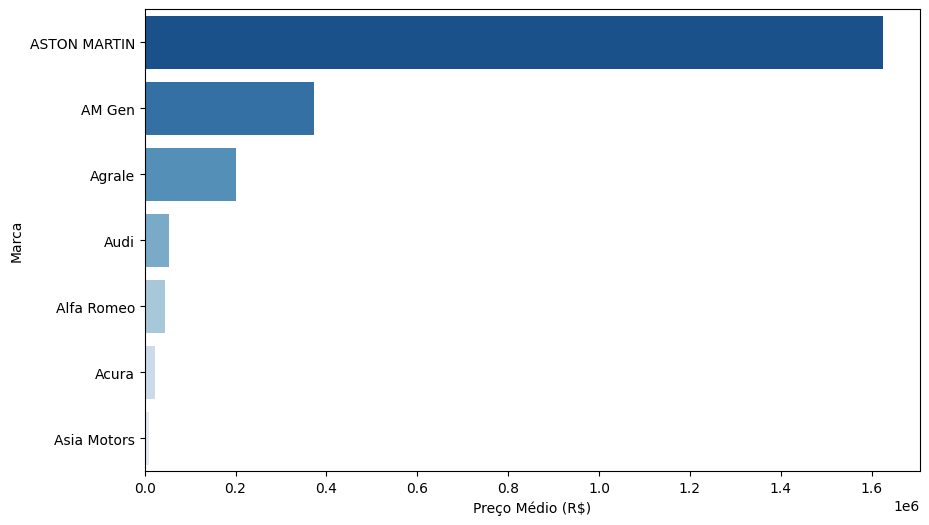

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=df_marca, y="marca", x="preco_medio", palette="Blues_r")
plt.xlabel("Preço Médio (R$)")
plt.ylabel("Marca")
plt.show()


### Preço médio por tipo de combustível

In [5]:
query = """
SELECT combustivel, ROUND(AVG(valor)::numeric, 2) AS preco_medio, COUNT(*) AS total
FROM fipe_carros
WHERE valor IS NOT NULL
GROUP BY combustivel
ORDER BY preco_medio DESC;
"""
df_comb = pd.read_sql(query, engine)
df_comb

,combustivel,preco_medio,total
0,Gasolina,324787.64,197
1,Diesel,162134.53,141


#### Gráfico de pizza

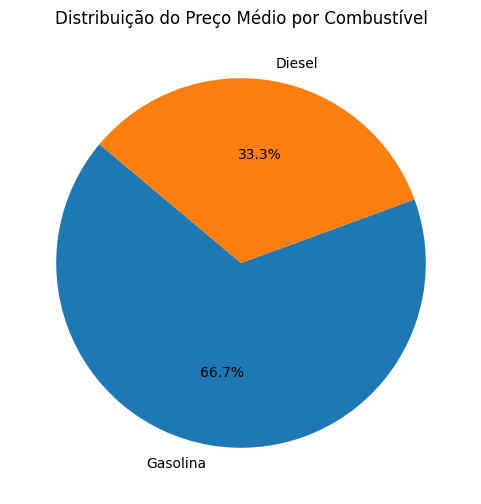

In [6]:
plt.figure(figsize=(6,6))
plt.pie(df_comb["preco_medio"], labels=df_comb["combustivel"], autopct="%1.1f%%", startangle=140)
plt.title("Distribuição do Preço Médio por Combustível")
plt.show()


### Evolução de preço por ano-modelo

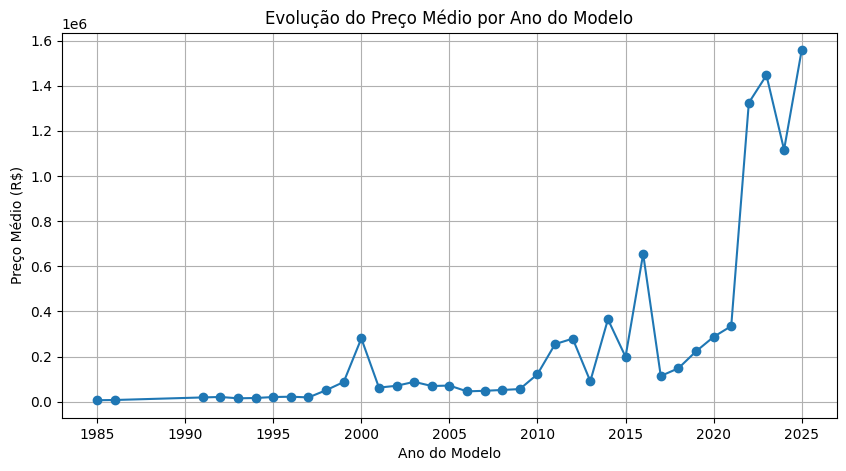

In [7]:
query = """
SELECT ano_modelo, ROUND(AVG(valor)::numeric, 2) AS preco_medio
FROM fipe_carros
WHERE ano_modelo IS NOT NULL AND valor IS NOT NULL
GROUP BY ano_modelo
ORDER BY ano_modelo;
"""
df_ano = pd.read_sql(query, engine)

plt.figure(figsize=(10,5))
plt.plot(df_ano["ano_modelo"], df_ano["preco_medio"], marker="o")
plt.title("Evolução do Preço Médio por Ano do Modelo")
plt.xlabel("Ano do Modelo")
plt.ylabel("Preço Médio (R$)")
plt.grid(True)
plt.show()
